In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import SpectralCoclustering
from sklearn.datasets import make_blobs
from anti_clustering import ExactClusterEditingAntiClustering
from sklearn import datasets
import pandas as pd
from pathlib import Path
import re

import os
import glob2
import scipy

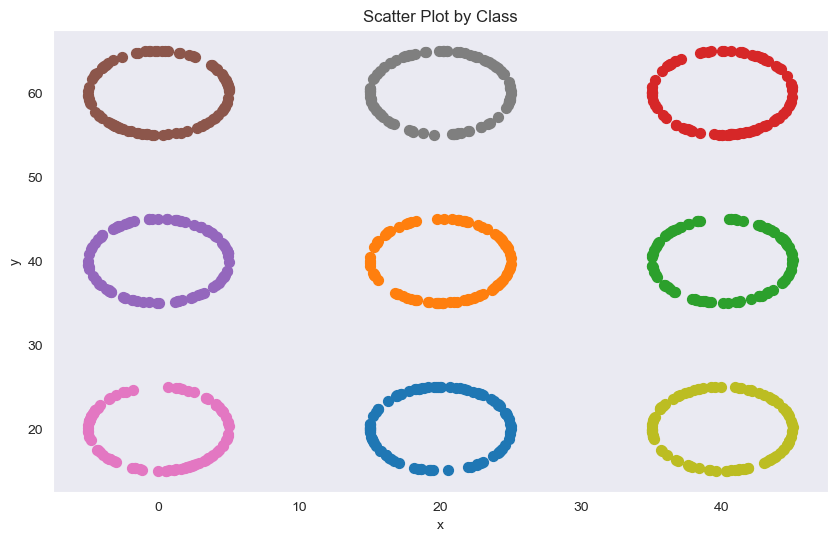

In [60]:
# Load data from CSV
df = pd.read_csv('\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\datasets\\data\\Synthetic.csv', sep="\t")
cls_only = [1,2,3,11,12,13,21,22,23]
#cls_only = [1,2,11,12]

# Plot each class with a unique color
plt.figure(figsize=(10, 6))
for cls in df['class'].unique():
    subset = df[df['class'] == cls]
    if cls in cls_only:
        plt.scatter(subset['x'], subset['y'], label=f'Class {cls}', s=50)

# Labeling and display options
plt.xlabel('x')
plt.ylabel('y')
plt.grid(False)
#plt.legend(title='Class')
plt.title('Scatter Plot by Class')
plt.show()

In [61]:
p = 4
k = 4
inst_name = 'pr1002'

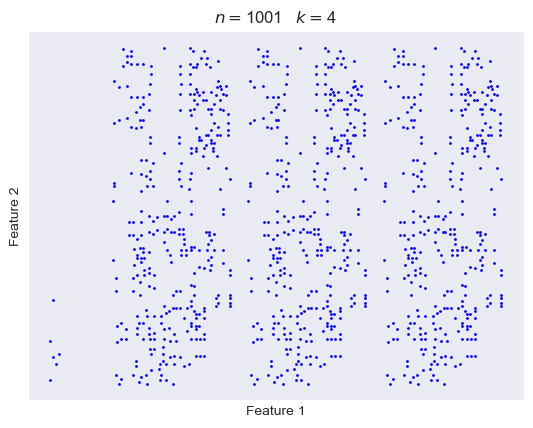

Done!


In [72]:
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\datasets\\results\\' + str(p) + 'part\\' + inst_name + '\\' + inst_name + '_' + str(k) + '_DATA.txt'
with open(result_path, 'r') as file:
    data = np.loadtxt(file)
    n = data.shape[0]-1
    plt.scatter(data[1:,0], data[1:,1], s=1, c='b')
    plt.grid(False)
    plt.title("$n=$" + str(n) + "   $k=$" + str(k))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

print('Done!')

C:\Users\moden\AppData\Local\Temp\ipykernel_14312\1750363465.py:57: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data[p1,0], data[p1,1], s=100, edgecolor='black', facecolor='none', marker=markers[idx_p], label="$Swap_" + str(idx_p+1) + "$")
C:\Users\moden\AppData\Local\Temp\ipykernel_14312\1750363465.py:58: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data[p2,0], data[p2,1], s=100, edgecolor='black', facecolor='none', marker=markers[idx_p], label="$Swap_" + str(idx_p+1) + "$")
C:\Users\moden\AppData\Local\Temp\ipykernel_14312\1750363465.py:57: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor i

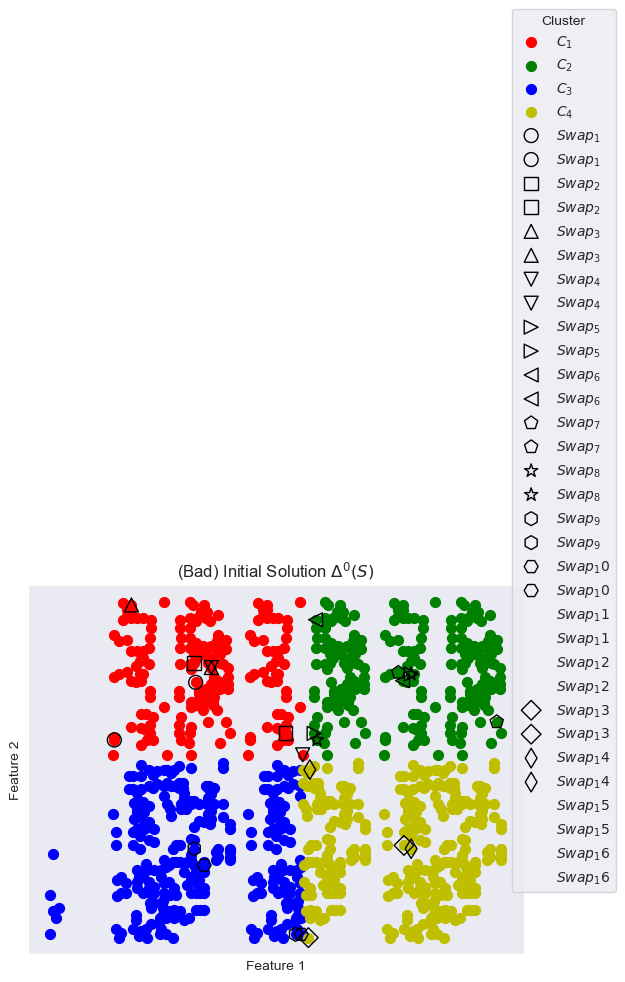

Done!


In [73]:
x_points = []
y_points = []
s_cls = []
pattern = r'cluster (\d+) swap (\d+) change (\d+)'
with open('\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\datasets\\results\\' + str(p) + 'part\\' + inst_name + '\\' + inst_name + '_' + str(k) + '_swaps.txt', 'r') as file:
    for line in file:
        match = re.search(pattern, line)
        if match:
            # Extract the values (convert to integers)
            c = int(match.group(1))
            p1 = int(match.group(2))
            p2 = int(match.group(3))
            
            # Append to the points (as an example, plotting p1 vs p2)
            s_cls.append(c)
            x_points.append(p1)
            y_points.append(p2)

result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\datasets\\results\\' + str(p) + "part\\" + inst_name + "\\"
color_map = ["r", "g", "b", "y", "m", "c", "k", "orange", "purple", "pink", "gray", "olive", "brown"]
markers = [
    'o',  # Circle
    's',  # Square
    '^',  # Triangle Up
    'v',  # Triangle Down
    '>',  # Triangle Right
    '<',  # Triangle Left
    'p',  # Pentagon
    '*',  # Star
    'h',  # Hexagon 1
    'H',  # Hexagon 2
    '+',  # Plus
    'x',  # Cross
    'D',  # Diamond
    'd',  # Thin Diamond
    '|',  # Vertical Line
    '_',  # Horizontal Line
    ',',  # Pixel
    '1',  # Tri Down (Marker style for 3D plots)
    '2',  # Tri Up (Marker style for 3D plots)
    '3'   # Tri Left (Marker style for 3D plots)
]

if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if ("KM" in str(file)):
            plt.title("(Bad) Initial Solution $\Delta^0(S)$")
            for c in range(0,k):
                cls = np.loadtxt(file, usecols=c)
                j = np.where(cls == 1)
                plt.scatter(data[j,0], data[j,1], s=50, c=color_map[c], label="$C_" + str(c+1) + "$")
                
            for idx_p in range(0, len(x_points)):
                p1 = x_points[idx_p]
                p2 = y_points[idx_p]
                cls = s_cls[idx_p]
                plt.scatter(data[p1,0], data[p1,1], s=100, edgecolor='black', facecolor='none', marker=markers[idx_p], label="$Swap_" + str(idx_p+1) + "$")
                plt.scatter(data[p2,0], data[p2,1], s=100, edgecolor='black', facecolor='none', marker=markers[idx_p], label="$Swap_" + str(idx_p+1) + "$")
            plt.legend(title="Cluster", loc= "lower right", bbox_to_anchor=(1.2, 0.15))
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.xticks([])
            plt.yticks([])
            plt.savefig(result_path + "hsol1.png", bbox_inches='tight')
            plt.show()
else:
    print("File does not exists!")
    
print('Done!')

In [29]:
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\datasets\\results\\' + str(p) + "part\\" + inst_name + "\\"
color_map = ["r", "g", "b", "y", "m", "c", "k", "orange", "purple", "pink", "gray", "olive", "brown"]
marker_map = ["o", "<", ">", "D", "*", ".", ",", "v", "^"]
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if ("OPT" in str(file)):
            #part = np.loadtxt(file, usecols=0).astype(int)
            #point = np.loadtxt(file, usecols=1).astype(int)
            data = np.loadtxt(file, usecols=range(0,2))
            
            plt.title("Optimal Solution")
            for c in range(0,k):
                cls = np.loadtxt(file, usecols=2+c)
                j = np.where(cls == 1)
                plt.scatter(data[j+1,0], data[j+1,1], s=20, c=color_map[c], label=c+1)
            plt.legend(title="Cluster", loc = "lower right")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.xticks([])
            plt.yticks([])
            #plt.savefig(result_path + file + ".png", bbox_inches='tight')
            plt.show()
else:
    print("File does not exists!")

print('Done!')

Done!


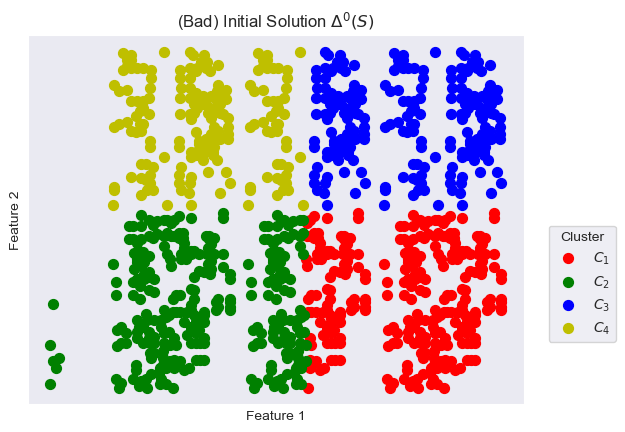

Done!


In [51]:
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\datasets\\results\\' + str(p) + "part\\" + inst_name + "\\"
color_map = ["r", "g", "b", "y", "m", "c", "k", "orange", "purple", "pink", "gray", "olive", "brown"]
marker_map = ["o", "<", ">", "D", "*", ".", ",", "v", "^"]
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if ("KM" in str(file)):
            plt.title("(Bad) Initial Solution $\Delta^0(S)$")
            for c in range(0,k):
                cls = np.loadtxt(file, usecols=c)
                j = np.where(cls == 1)
                plt.scatter(data[j,0], data[j,1], s=50, c=color_map[c], label="$C_" + str(c+1) + "$")
            plt.legend(title="Cluster", loc= "lower right", bbox_to_anchor=(1.2, 0.15))
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.xticks([])
            plt.yticks([])
            plt.savefig(result_path + "hsol1.png", bbox_inches='tight')
            plt.show()
else:
    print("File does not exists!")
    
print('Done!')

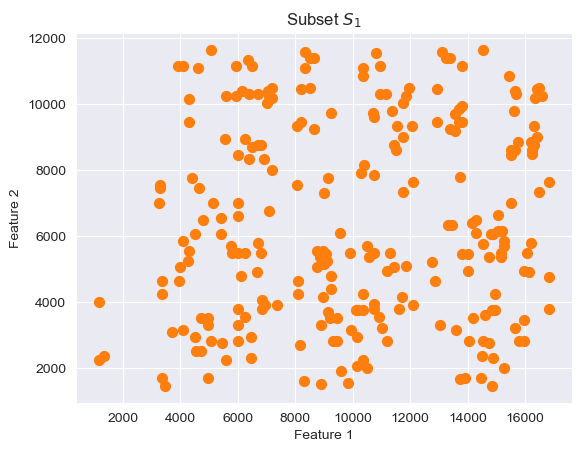

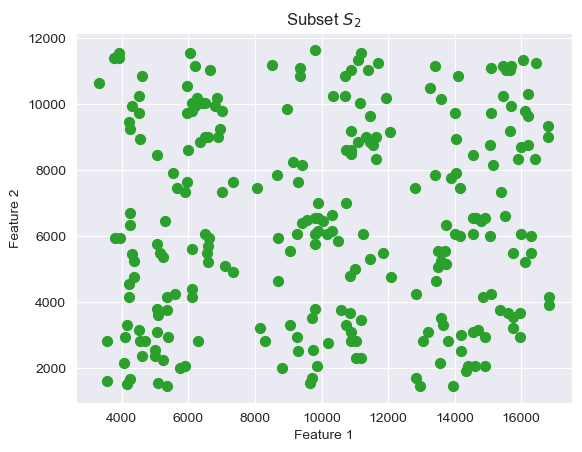

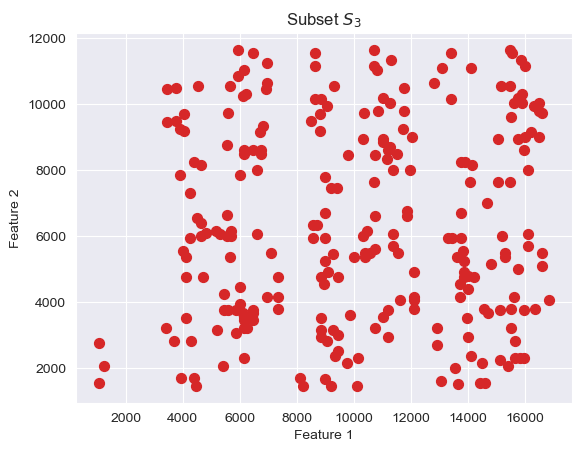

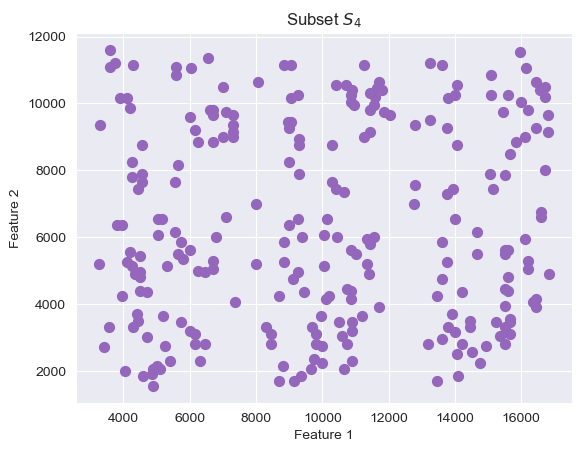

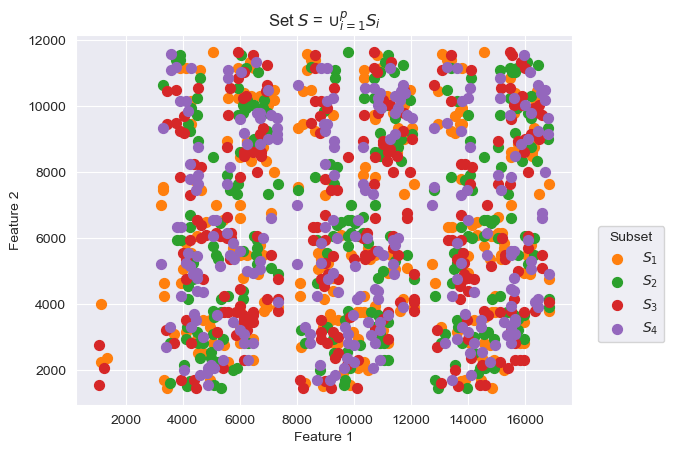

Done!


In [52]:
result_path = '\\\wsl.localhost\\Ubuntu-22.04\\home\\aelle\\mr-sos-dp\\datasets\\results\\' + str(p) + "part\\" + inst_name + "\\"
color_map = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Olive
    '#17becf'   # Teal
]

marker_map = [".", "o", "D", "^", ",", "v", "^", "<", ">"]
for pp in range(0,p):
    file = result_path + inst_name + "_" + str(k) + "_PART_" + str(pp) + ".txt"
                #part = np.loadtxt(file, usecols=0).astype(int)
                #point = np.loadtxt(file, usecols=1).astype(int)
    data = np.loadtxt(file, usecols=range(0,2))
    num_p = pp + 1
    plt.scatter(data[:,0], data[:,1], s=50, c=color_map[num_p])
                
    plt.title("Subset $S_" + str(num_p) + "$")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    #plt.xticks([])
    #plt.yticks([])
    plt.savefig(result_path + "part" + str(num_p) + ".png", bbox_inches='tight')
    plt.show()

for pp in range(0,p):
    file = result_path + inst_name + "_" + str(k) + "_PART_" + str(pp) + ".txt"
                #part = np.loadtxt(file, usecols=0).astype(int)
                #point = np.loadtxt(file, usecols=1).astype(int)
    data = np.loadtxt(file, usecols=range(0,2))
    num_p = pp + 1
    plt.scatter(data[:,0], data[:,1], s=50, c=color_map[num_p], label="$S_" + str(num_p) + "$")
                
plt.title("Set $S$ = $\cup_{i=1}^p S_i$")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.xticks([])
#plt.yticks([])
plt.legend(title="Subset", loc="lower right", bbox_to_anchor=(1.2, 0.15))
plt.savefig(result_path + "parttot.png", bbox_inches='tight')
plt.show()

print('Done!')

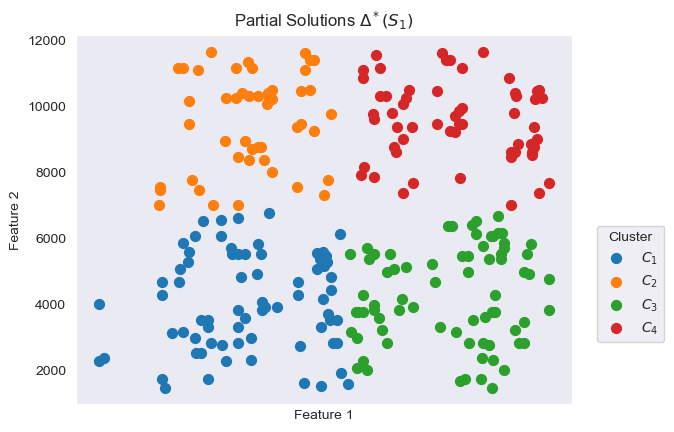

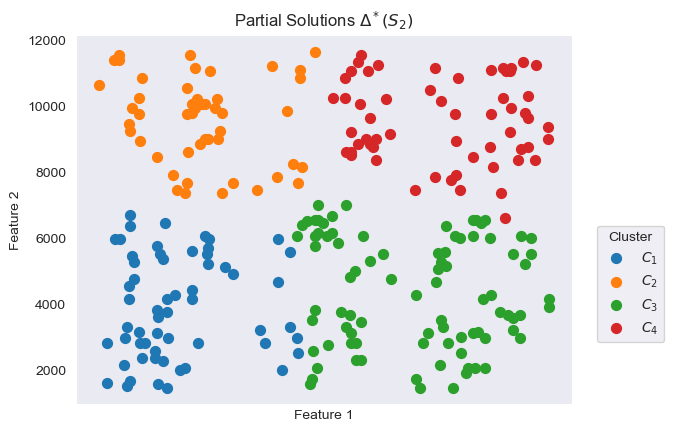

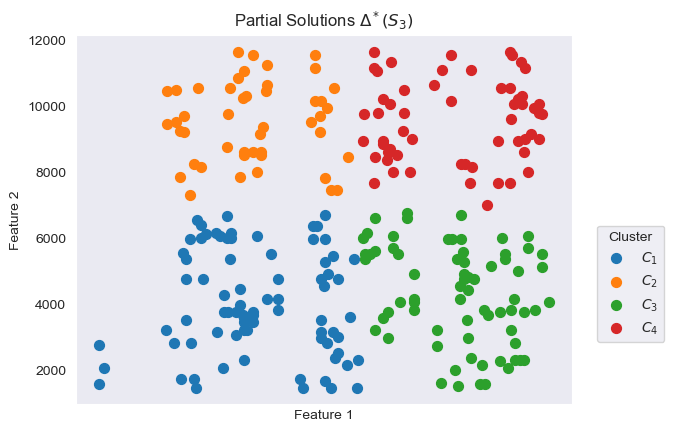

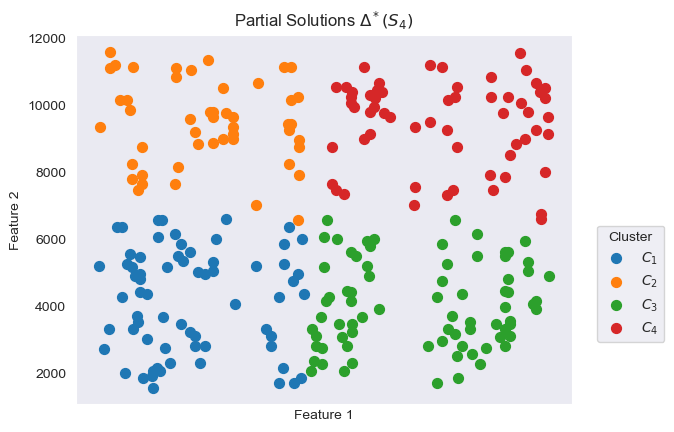

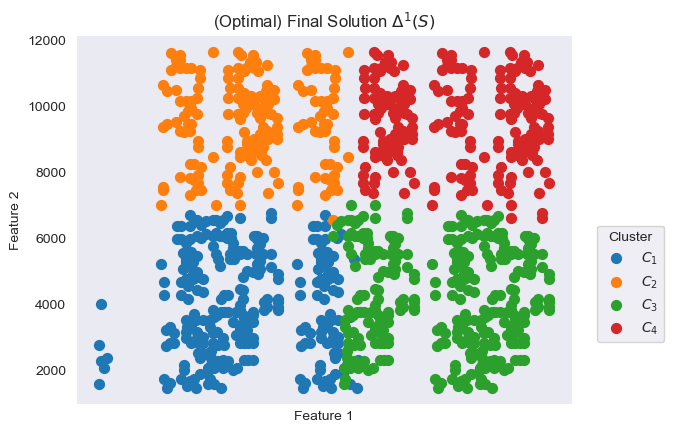

Done!


In [53]:
color_map = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Olive
    '#17becf'   # Teal
]

if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if (str(k) + "_UB" in str(file)):
            part = np.loadtxt(file, usecols=0).astype(int)
            point = np.loadtxt(file, usecols=1).astype(int)
            data = np.loadtxt(file, usecols=range(2,4))
            cls = np.loadtxt(file, usecols=4).astype(int)
            n = point.shape[0]
            for h in range(0,p):
                for c in range(1,k+1):
                    j = np.where((cls == c-1) & (part == h))[0]
                    plt.scatter(data[j,0], data[j,1], s=50, c=color_map[c-1], label="$C_" + str(c) + "$")
                plt.title("Partial Solutions $\Delta^*(S_" + str(h+1) + ")$")
                plt.legend(title="Cluster", loc = "lower right", bbox_to_anchor=(1.2, 0.15))
                plt.grid(False)
                plt.xlabel("Feature 1")
                plt.ylabel("Feature 2")
                plt.xticks([])
                plt.savefig(result_path + "cls" + str(h+1) + ".png", bbox_inches='tight')
                plt.show()
                
            
            plt.title("(Optimal) Final Solution $\Delta^1(S)$")
            for c in range(1,k+1):
                j = np.where(cls == c-1)
                plt.scatter(data[j,0], data[j,1], s=50, c=color_map[c-1], label="$C_" + str(c) + "$")
            plt.legend(title="Cluster", loc = "lower right", bbox_to_anchor=(1.2, 0.15))
            plt.grid(False)
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.xticks([])
            plt.savefig(result_path + "clstot.png", bbox_inches='tight')
            plt.show()

print('Done!')

In [100]:
if os.path.exists(result_path):
    for file in glob2.glob(result_path + "*.txt"):
        if "UB" in str(file):
            part = np.loadtxt(file, usecols=0).astype(int)
            point = np.loadtxt(file, usecols=1).astype(int)
            data = np.loadtxt(file, usecols=range(2,4))
            cls = np.loadtxt(file, usecols=4).astype(int)
            n = point.shape[0]
            for c in np.unique(cls):
                j = np.where(cls == c)
                plt.scatter(data[j,0], data[j,1], s=50, c=color_map[c], label=c+1)
            file = Path(file).stem
            plt.title(file)
            plt.legend(title="Clusters", bbox_to_anchor=(1.2, 0.75))
            #plt.savefig(result_path + file + ".png", bbox_inches='tight')
            plt.show()

print('Done!')

Done!


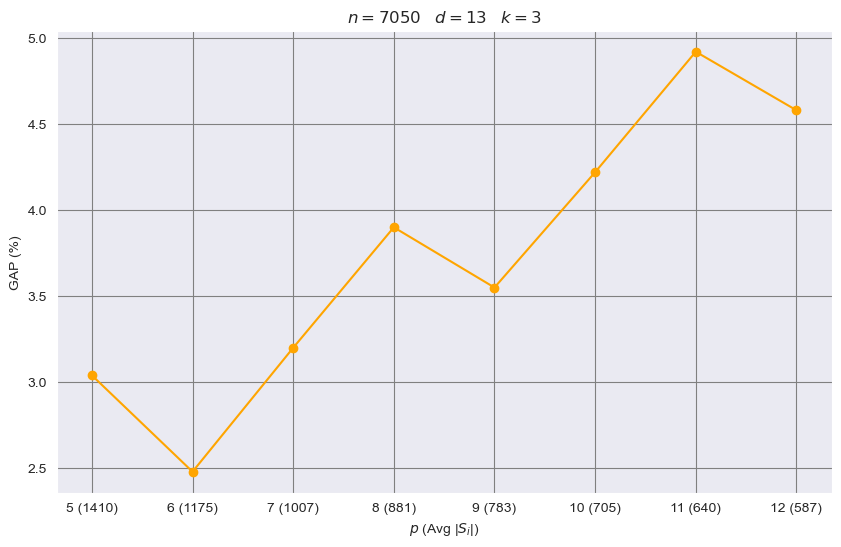

In [101]:
result_path = 'C:\\Users\\moden\\OneDrive - uniroma1.it\\Desktop\\'
partial_sol = [12, 11, 10, 9, 8, 7, 6, 5]
gap = [4.58, 4.92, 4.22, 3.55, 3.90, 3.2, 2.48, 3.04]
total_points = 7050

# Calculate the average number of points per partial solution
avg_points_per_partial_sol = [total_points // ps for ps in partial_sol]
x_labels = [f'{ps} ({avg})' for ps, avg in zip(partial_sol, avg_points_per_partial_sol)]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(partial_sol, gap, marker='o', linestyle='-', color='orange')

# Adding title and labels
plt.title('$n=7050$   $d=13$   $k=3$')
plt.xlabel('$p$ (Avg |$S_i$|)')
plt.ylabel('GAP (%)')

# Display the plot
plt.xticks(partial_sol, x_labels)
plt.grid(True, color='grey')
plt.savefig(result_path + "trend.png", bbox_inches='tight')
plt.show()

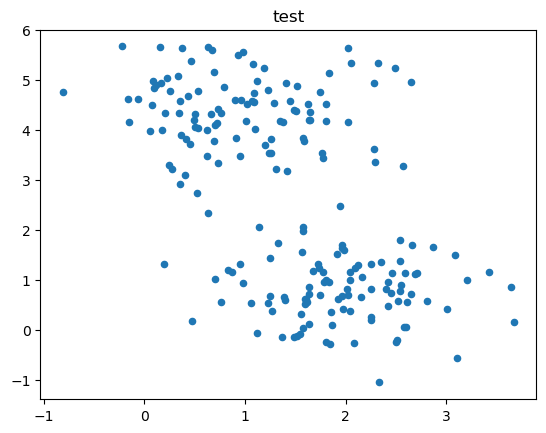

In [31]:
X, y_true = make_blobs(n_samples=200, centers=k, cluster_std=0.7, random_state=0)

plt.title("test")
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.show()

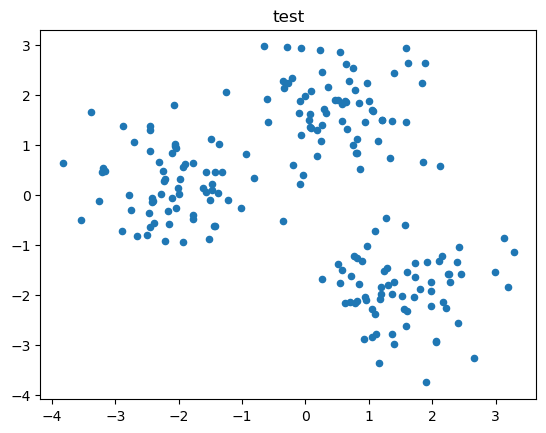

In [11]:
centroid = np.mean(X, axis=0)
X2 = X - centroid
#dist2 = np.max(dist) - dist
#X2 = X + np.expand_dims(dist, axis=1)

plt.title("test")
plt.scatter(X2[:, 0], X2[:, 1], s=20)
plt.show()

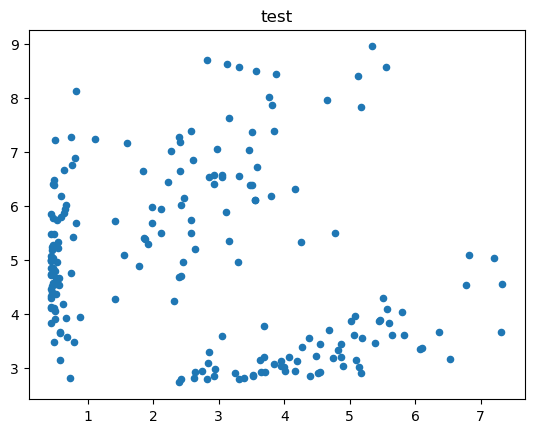

In [10]:
centroid = np.mean(X, axis=0)
dist = np.linalg.norm(X - centroid, axis=1)
#dist2 = np.max(dist) - dist
X2 = X + np.expand_dims(dist, axis=1)

plt.title("test")
plt.scatter(X2[:, 0], X2[:, 1], s=20)
plt.show()

In [ ]:
iris_data = datasets.load_iris(as_frame=True)
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

algorithm = ExactClusterEditingAntiClustering()

df = algorithm.run(
    df=iris_df,
    numerical_columns=list(iris_df.columns),
    categorical_columns=None,
    num_groups=2,
    destination_column='Cluster'
)